In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torch.optim as optim
from torch.optim.lr_scheduler import ReduceLROnPlateau
import time


In [2]:
# Check if CUDA (GPU support) is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [3]:
T_i = 500
T_f = 100
k = 5
x = 0
dx =   # make trails
l = 10
x_data = np.arange(x,dx+l, dx)
q=1000000

In [4]:
x_data=torch.from_numpy(x_data.astype(np.float32))
x_data=x_data.view(x_data.shape[0],1).to(device)
x_data.dtype

torch.float32

In [5]:
class PINN(nn.Module): # make trials on num of neurons, layers and activation fn
    def __init__(self):
        super(PINN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 31),
            nn.Tanh(),
            nn.Linear(31, 31),
            nn.,  #make trails

            nn.Linear(31, 1),

        )

    def forward(self, x):
        return self.layers(x)


In [6]:
# Define the loss function

def pde_loss(model, x_data):
    x_data.requires_grad = True
    T = model(x_data)

    # Compute the first derivative
    T_x = torch.autograd.grad(T, x_data, torch.ones_like(T), create_graph=True, retain_graph=True)[0]
    T_x = T_x[:, 0]

    # Compute the second derivative
    T_xx = torch.autograd.grad(T_x, x_data, torch.ones_like(T_x), create_graph=True)[0]
    T_xx = T_xx[:, 0]

    # Calculate the PDE loss term using your specific PDE equation
    # For example, if your PDE is of the form: T_xx - q = 0
    pde_term = k*T_xx + q  # Modify this according to your specific PDE

    # Compute the loss
    loss = torch.mean(torch.square(pde_term))

    return loss


def initial_boundary_loss(model, device):
    x_i = x_data[0]
    T_initial_pred = model(x_i)
    T_initial_exact = torch.tensor([[T_i]], dtype=torch.float32).to(device)   # Example initial condition
    loss = nn.MSELoss()(T_initial_pred, T_initial_exact)
    return loss


def final_boundary_loss(model, device):
    x_f = x_data[-1]
    T_final_pred = model(x_f)
    T_final_exact = torch.tensor([[T_f]], dtype=torch.float32).to(device)   # Example final condition
    loss = nn.MSELoss()(T_final_pred, T_final_exact)
    return loss


In [7]:
model = PINN().to(device)

optimizer = torch.optim.Adam(model.parameters(), lr= )  # make trails for lr

In [8]:
s= time.time()
batch_size = 50
num_batches = len(x_data) // batch_size
for epoch in range(# make trails):
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = (i + 1) * batch_size
        batch_x_data = x_data[start_idx:end_idx]

        optimizer.zero_grad()

        pde_loss_val = pde_loss(model, batch_x_data)
        initial_loss = initial_boundary_loss(model, device)  # Call the function and use .item()
        final_loss = final_boundary_loss(model, device) # Call the function and use .item()



        total_loss = pde_loss_val + initial_loss + final_loss
        total_loss.backward()
        optimizer.step()

    if epoch % 1000 == 0:
        print(f"Epoch [{epoch}], Total Loss: {total_loss:.4e}, PDE Loss: {pde_loss_val.item():.4e}, Initial boundary Loss: {initial_loss:.4e}, final boundary Loss: {final_loss:.4e}")


    # Test the trained model
    with torch.no_grad():
        T_pred = model(torch.tensor(x_data, dtype=torch.float32))

e= time.time()



/home/krishna/anaconda3/lib/python3.11/site-packages/torch/nn/modules/loss.py:535: UserWarning: Using a target size (torch.Size([1, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch [0], Total Loss: 1.1673e+05, PDE Loss: 1.0001e+04, Initial boundary Loss: 2.4998e+05, final boundary Loss: 9.9444e+03


/tmp/ipykernel_26852/3882907490.py:28: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  T_pred = model(torch.tensor(x_data, dtype=torch.float32))


Epoch [1000], Total Loss: 8.7244e+04, PDE Loss: 1.0000e+04, Initial boundary Loss: 1.9274e+05, final boundary Loss: 1.5225e+03
Epoch [2000], Total Loss: 6.7284e+04, PDE Loss: 1.0000e+04, Initial boundary Loss: 1.4963e+05, final boundary Loss: 1.7358e+02
Epoch [3000], Total Loss: 5.2826e+04, PDE Loss: 1.0000e+04, Initial boundary Loss: 1.1366e+05, final boundary Loss: 3.9528e+03
Epoch [4000], Total Loss: 3.5710e+04, PDE Loss: 2.6637e+03, Initial boundary Loss: 7.9520e+04, final boundary Loss: 2.3308e-03
Epoch [5000], Total Loss: 2.3614e+04, PDE Loss: 1.5006e+03, Initial boundary Loss: 5.2587e+04, final boundary Loss: 3.4442e-02
Epoch [6000], Total Loss: 1.4287e+04, PDE Loss: 1.2205e+03, Initial boundary Loss: 3.1814e+04, final boundary Loss: 4.8673e-02
Epoch [7000], Total Loss: 7.5055e+03, PDE Loss: 9.8024e+02, Initial boundary Loss: 1.6712e+04, final boundary Loss: 6.0946e-02
Epoch [8000], Total Loss: 3.1010e+03, PDE Loss: 8.2671e+02, Initial boundary Loss: 6.9026e+03, final boundary L

In [9]:
print((e-s)/60)

2.7746756156285604


In [10]:
T_pred.shape

torch.Size([101, 1])

In [11]:
T_pred=T_pred.cpu().detach().numpy()
T_pred.shape

(101, 1)

In [12]:
T_pred.size

101

In [13]:
x_data=x_data.cpu().detach().numpy()
x_data.shape

(101, 1)

In [14]:
x_data=x_data.reshape(101)

In [15]:

T_pred[-1]


array([99.49744], dtype=float32)

In [16]:
 print(f"Epoch [{epoch}/1000], Total Loss: {total_loss:.4e}, PDE Loss: {pde_loss_val.item():.4e}, Initial boundary Loss: {initial_loss:.4e}, final boundary Loss: {final_loss:.4e}")



Epoch [39999/1000], Total Loss: 1.2287e-01, PDE Loss: 1.8474e+01, Initial boundary Loss: 4.3064e-06, final boundary Loss: 1.9137e-01


In [17]:
x_data=np.arange(x, dx+l, dx)
T_data = -q/2/k*x_data*x_data + ((T_f-T_i)/l + q/2/k*l)*x_data + T_i


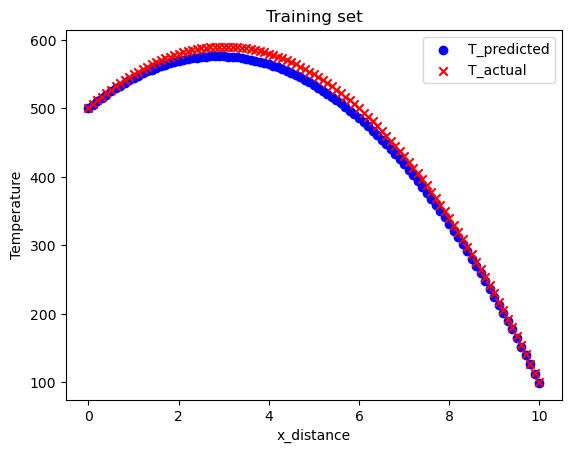

In [18]:

plt.title('Training set')

plt.scatter(x_data, T_pred, label='T_predicted', color='blue', marker='o')
plt.scatter(x_data, T_data, label='T_actual', color='red', marker='x')


plt.xlabel('x_distance')
plt.ylabel('Temperature')
plt.legend()
plt.show()

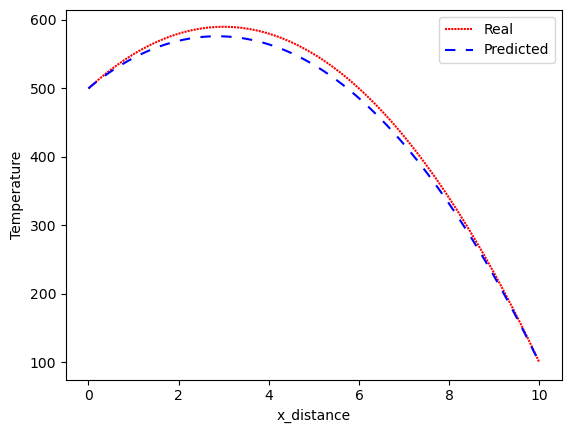

In [19]:
fig, ax1 = plt.subplots()
ax1.plot(x_data,T_data,linestyle='--', dashes=(1, 0.5),color='red',label='Real')
ax1.plot(x_data,T_pred,linestyle='--', dashes=(5, 5),color='blue',label='Predicted')
#ax1.plot(x,f_x_plot,color='green',label='Derivative')
ax1.set_xlabel('x_distance',color='black')
ax1.set_ylabel('Temperature',color='black')
ax1.tick_params(axis='y', color='black')
ax1.legend(loc = 'upper right')